<a href="https://colab.research.google.com/github/jaider4567/taller2/blob/main/taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def generate_cities(number_cities: int) -> np.ndarray:

    """
    it generates a list cities and return it
    """

    cities = np.random.rand(number_cities, 3)
    return cities


def calculate_distance(point_1: np.array, point_2: np.array) -> float:

    """
      calculate the distance between two points using the euclidean formula and return the distance
    """

    return np.sqrt(np.sum((point_2 - point_1)**2))

In [ ]:
def ant_colony_optimization(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):

    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.
    """
    # get the size of the array cities and define the pheromone array with ones using np.ones of the same size
    number_cities =  cities.shape[0]
    pheromone = np.ones((number_cities, number_cities))

    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city

                #define the equation for the ants, using alpha, beta, pheromones array, and the function calculate_distance
                for i, unvisited_city in enumerate(unvisited):
                    probabilities[i] = (pheromone[current_city, unvisited_city] ** alpha) * \
                                        ((1 / -(calculate_distance(cities[current_city], cities[unvisited_city])) ** beta))

                # normalize probabilities, it means, the sum of all probabilities is 1
                # HERE add normalization for calculated probabilities
                probabilities /= np.sum(probabilities)

                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
    return best_path, best_path_length

In [ ]:
# model parameters
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)


[24, 29, 38, 46, 4, 25, 27, 2, 36, 37, 21, 3, 49, 14, 20, 44, 18, 33, 43, 19, 45, 35, 48, 23, 28, 16, 42, 40, 47, 10, 31, 12, 15, 7, 11, 6, 41, 26, 32, 5, 30, 8, 34, 1, 9, 22, 0, 13, 39, 17]
14.128563118577501


Best path: [36, 35, 27, 25, 34, 45, 47, 7, 3, 28, 29, 33, 5, 48, 49, 13, 18, 1, 10, 43, 41, 23, 4, 21, 8, 19, 22, 9, 38, 15, 6, 39, 16, 44, 37, 31, 17, 20, 40, 14, 42, 32, 30, 0, 26, 12, 24, 2, 46, 11]
Best path length: 13.685542517941988


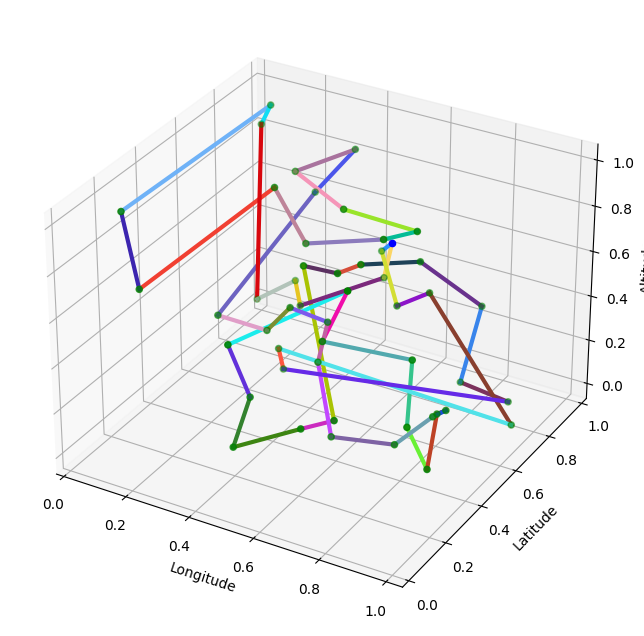

In [ ]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()


print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)